# IMAGE CLASSIFICATION USING DEEP LEARNING
    This notebook shows how to build an image classification system using TensorFlow. It covers loading data, preparing it, creating a CNN model, training it, and checking its performance


## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
TRAIN_IMAGES_PATH = "emnist_source_files/emnist-balanced-train-images-idx3-ubyte"
TRAIN_LABELS_PATH = "emnist_source_files/emnist-balanced-train-labels-idx1-ubyte"
TEST_IMAGES_PATH = "emnist_source_files/emnist-balanced-test-images-idx3-ubyte"
TEST_LABELS_PATH = "emnist_source_files/emnist-balanced-test-labels-idx1-ubyte"

In [3]:
def load_images(filepath):
    with open(filepath,"rb") as f:
        data = np.frombuffer(f.read(),np.uint8,offset=16)
        return data.reshape(-1,28,28,1).astype(np.float32) / 255.0

def load_labels(filepath):
    with open(filepath, 'rb') as f:
        data = np.frombuffer(f.read(),np.uint8,offset=8)
        return data

## Loading and Prepearing the Dataset

In [4]:
train_images = load_images(TRAIN_IMAGES_PATH)
train_labels = load_labels(TRAIN_LABELS_PATH)
test_images = load_images(TEST_IMAGES_PATH)
test_labels = load_labels(TEST_LABELS_PATH)

In [5]:
train_labels

array([45, 36, 43, ..., 23, 31,  8], dtype=uint8)

## Building the CNN Model

In [6]:
import keras
import tensorflow as tf

In [7]:
train_labels = keras.utils.to_categorical(train_labels,num_classes=47)
test_labels = keras.utils.to_categorical(test_labels,num_classes=47)

In [8]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images,train_labels)).shuffle(10000).batch(128)
test_ds = tf.data.Dataset.from_tensor_slices((test_images,test_labels)).batch(128)

In [9]:
print(f"Train Shape: {train_images.shape}, {train_labels.shape}")
print(f"Test Shape: {test_images.shape}, {test_labels.shape}")

Train Shape: (112800, 28, 28, 1), (112800, 47)
Test Shape: (18800, 28, 28, 1), (18800, 47)


In [10]:
from keras import layers

In [11]:
model = keras.models.Sequential([

    keras.Input(shape=(28,28,1)),
    layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128,(3,3),activation="relu"),

    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(47,activation="softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 47)                  │           6,063 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 246,319 (962.18 KB)

 Trainable params: 246,319 (962.18 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer = "adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

## Training the Model

In [13]:
abc = model.fit(train_ds,validation_data=test_ds,epochs=10,verbose=1)

Epoch 1/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.6166 - loss: 1.3620 - val_accuracy: 0.8344 - val_loss: 0.4898
Epoch 2/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.8520 - loss: 0.4313 - val_accuracy: 0.8535 - val_loss: 0.4263
Epoch 3/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.8715 - loss: 0.3647 - val_accuracy: 0.8689 - val_loss: 0.3787
Epoch 4/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.8835 - loss: 0.3271 - val_accuracy: 0.8755 - val_loss: 0.3678
Epoch 5/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.8890 - loss: 0.3010 - val_accuracy: 0.8714 - val_loss: 0.3713
Epoch 6/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.8965 - loss: 0.2797 - val_accuracy: 0.8681 - val_loss: 0.3784
Epoch 7/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.9001 - loss: 0.2616 - val_accuracy: 0.8739 - val_loss: 0.3743
Epoch 8/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.9052 - loss: 0.2451 - 

## Evaluating and Testing the Model

In [14]:
test_loss,test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8774 - loss: 0.3701
Test Loss: 0.37524884939193726, Test Accuracy: 0.8770212531089783


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


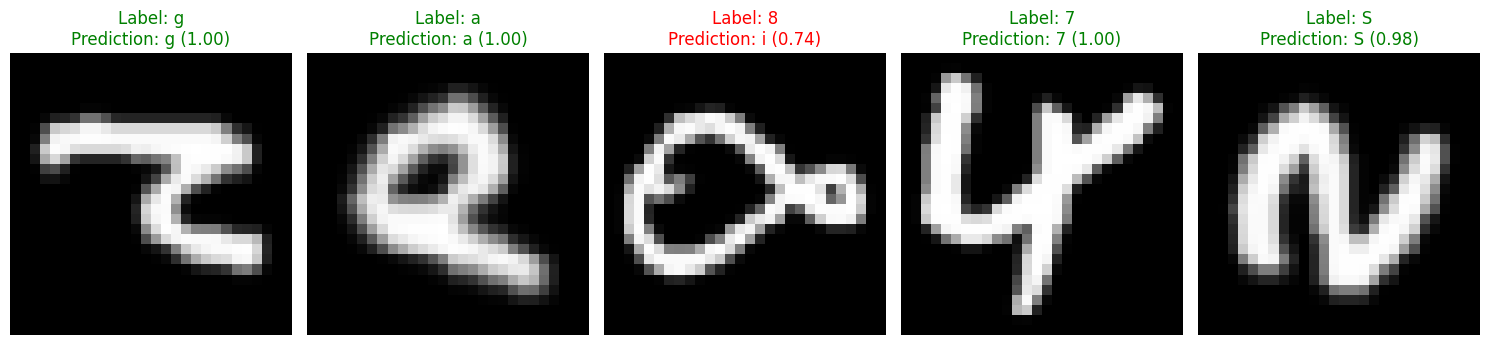

In [15]:
class_names = [
    "0", "1", "2", "3", "4", "5", "6", "7", "8", "9",
    "A", "B", "C", "D", "E", "F", "G", "H", "I", "J",
    "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T",
    "U", "V", "W", "X", "Y", "Z", "a", "b", "c", "d",
    "e", "f", "g", "h", "i", "j", "k", "l", "m", "n",
    "o", "p", "q", "r", "s", "t", "u", "v", "w", "x",
    "y", "z"
][:47] 



import random

indices = random.sample(range(len(test_images)),5)
samples = test_images[indices]
true_labels = [np.argmax(test_labels[index]) for index in indices] 
predictions = model.predict(samples)
predicted_labels =[np.argmax(pred) for pred in predictions]

plt.figure(figsize = (15,5))
for i,idx in enumerate(indices):
    plt.subplot(1,5,i+1)
    plt.imshow(samples[i].reshape(28,28),cmap="gray")
    plt.axis("off")

    true_label = class_names[true_labels[i]]
    predicted_label = class_names[predicted_labels[i]]
    confidence = np.max(predictions[i])
    
    title_color = "green" if true_labels[i] == predicted_labels[i] else "red"
    plt.title(f"Label: {true_label}\nPrediction: {predicted_label} ({confidence:.2f})", color=title_color)

plt.tight_layout()
plt.show()
